# STA 141B Assignment 3

Due __Feb 11, 2019__ by 11:59pm. Submit by editing this file, committing the changes with git, and then pushing to your private GitHub repo for the assignment. This assignment will be graded according to the class rubric.

Please do not rename this file or delete the exercise cells, because it will interfere with our grading tools. Put your answers in new cells after each exercise. You can make as many new cells as you like. Use code cells for code and Markdown cells for text. Answer all questions with complete sentences.

The purpose of this assignment is to practice using web APIs and combining data from multiple sources.

## USDA Food Composition

The US Department of Agriculture publishes price estimates for fruits and vegetables [online](https://www.ers.usda.gov/data-products/fruit-and-vegetable-prices/fruit-and-vegetable-prices/). The most recent estimates are based on a 2013 survey of US retail stores. We've cleaned and merged the fruit and vegetable price estimates for you. The result is the `fresh.csv` file included in the repository.

In this assignment, you'll combine the price estimates with nutrition data from the [USDA Food Composition Databases](https://ndb.nal.usda.gov/ndb/search/list), and then analyze the resulting dataset.

The USDA Food Composition Databases have a [documented](https://ndb.nal.usda.gov/ndb/doc/index) web API that returns data in JSON format . You need a key in order to use the API. Only 1000 requests are allowed per hour, so it's a good idea to use caching.

[Sign up for an API key here](https://api.data.gov/signup/). The key will work with any data.gov API. You may need the key again later in the quarter, so make sure you save it.

__Exercise 1.1__

Read the [search request documentation](https://ndb.nal.usda.gov/ndb/doc/apilist/API-SEARCH.md), then write a function called `ndb_search()` that makes a search request. The function should accept the search term as an argument. The function should return the search result items as a list (for 0 items, return an empty list).

Note that the search url is: `https://api.nal.usda.gov/ndb/search`

As an example, a search for `"quail eggs"` might return this list:

```python
[{'offset': 0,
  'group': 'Branded Food Products Database',
  'name': 'EL COMPI, QUAIL EGGS, UPC: 854955002226',
  'ndbno': '45362205',
  'ds': 'LI',
  'manu': "milly's desserts llc"},
 {'offset': 1,
  'group': 'Branded Food Products Database',
  'name': 'BUDDHA, QUAIL EGGS IN BRINE, UPC: 761934535098',
  'ndbno': '45099560',
  'ds': 'LI',
  'manu': 'Sung Ly International Corporation'},
 {'offset': 2,
  'group': 'Branded Food Products Database',
  'name': 'GRAN SABANA, QUAIL EGGS, UPC: 819140010103',
  'ndbno': '45169279',
  'ds': 'LI',
  'manu': 'L & M C Farms, Inc.'},
 {'offset': 3,
  'group': 'Branded Food Products Database',
  'name': 'L&W, QUAIL EGGS, UPC: 024072000256',
  'ndbno': '45094890',
  'ds': 'LI',
  'manu': 'L&W International Co.'},
 {'offset': 4,
  'group': 'Branded Food Products Database',
  'name': 'CHAOKOH, QUAIL EGG IN BRINE, UPC: 044738074186',
  'ndbno': '45094707',
  'ds': 'LI',
  'manu': 'Theppadung Porn Coconut Co'},
 {'offset': 5,
  'group': 'Dairy and Egg Products',
  'name': 'Egg, quail, whole, fresh, raw',
  'ndbno': '01140',
  'ds': 'SR',
  'manu': 'none'}]
```

As usual, make sure you document and test your function.

In [1]:
import requests
import requests_cache
requests_cache.install_cache("mycache")

In [2]:
!pwd #to see directory I am in 

/Users/anab/Local Documents/UC Davis/Year 3/STA 141B w: Ulle/assignment-3-annabsta141b


In [2]:
def read_key(keyfile):
    with open(keyfile) as f:
        return f.readline().strip("\n")

api_key = read_key("/Users/anab/Local Documents/UC Davis/Year 3/STA 141B w: Ulle/assignment-3-annabsta141b/key.txt")

In [3]:
def ndb_search(search_term):
    """The function returns the search result items as a list and for no items, the function returns 
    an empty list."""
    response = requests.get("https://api.nal.usda.gov/ndb/search", params = {
        "api_key": api_key,
         "q": search_term,
         #ds":'Standard Reference'
          
    })
    result = response.json()
    if 'list' not in result:
        return []
    else:
        return result['list']['item']
    

In [4]:
ndb_search("khkjhkhk")
#make sure docstring works
#help(ndb_search)

[]

In [37]:
ndb_search("quail eggs")


[{'offset': 0,
  'group': 'Branded Food Products Database',
  'name': 'EL COMPI, QUAIL EGGS, UPC: 854955002226',
  'ndbno': '45362205',
  'ds': 'LI',
  'manu': "milly's desserts llc"},
 {'offset': 1,
  'group': 'Branded Food Products Database',
  'name': 'BUDDHA, QUAIL EGGS IN BRINE, UPC: 761934535098',
  'ndbno': '45099560',
  'ds': 'LI',
  'manu': 'Sung Ly International Corporation'},
 {'offset': 2,
  'group': 'Branded Food Products Database',
  'name': 'GRAN SABANA, QUAIL EGGS, UPC: 819140010103',
  'ndbno': '45169279',
  'ds': 'LI',
  'manu': 'L & M C Farms, Inc.'},
 {'offset': 3,
  'group': 'Branded Food Products Database',
  'name': 'L&W, QUAIL EGGS, UPC: 024072000256',
  'ndbno': '45094890',
  'ds': 'LI',
  'manu': 'L&W International Co.'},
 {'offset': 4,
  'group': 'Branded Food Products Database',
  'name': 'CHAOKOH, QUAIL EGG IN BRINE, UPC: 044738074186',
  'ndbno': '45094707',
  'ds': 'LI',
  'manu': 'Theppadung Porn Coconut Co'},
 {'offset': 5,
  'group': 'Dairy and Egg Pro

__Exercise 1.2__

Use your search function to get NDB numbers for the foods in the `fresh.csv` file. It's okay if you don't get an NDB number for every food, but try to come up with a strategy that gets most of them. Discuss your strategy in a short paragraph.

Hints:

* The foods are all raw and unbranded.
* You can test search terms with the [online search page](https://ndb.nal.usda.gov/ndb/search/list).
* The [Python](https://docs.python.org/3/library/stdtypes.html#string-methods) and [Pandas](http://pandas.pydata.org/pandas-docs/stable/user_guide/text.html) string methods are useful here. It's okay if you use _simple_ regular expressions in the Pandas methods, although this exercise can be solved without them.
* You can merge data frames that have a column in common with `pd.merge()`.

In [14]:
!pwd

/Users/anab/Local Documents/UC Davis/Year 3/STA 141B w: Ulle/assignment-3-annabsta141b


In [6]:
import pandas as pd
fresh = pd.read_csv("/Users/anab/Local Documents/UC Davis/Year 3/STA 141B w: Ulle/assignment-3-annabsta141b/fresh.csv")
fresh.iloc[:,0]=fresh.iloc[:,0].str.strip("1")

#rename the cabbage to red cabbage in the fresh dataset. 
fresh.iloc[36,-2] = "green cabbage"
fresh.iloc[37,-2] = "red cabbage"
fresh.iloc[25,:]
fresh.iloc[25,-2] = "cucumbers w/ peel"
fresh.iloc[26,-2] = "cucumbers peeled"
fresh.tail()

,form,price_per_lb,yield,lb_per_cup,price_per_cup,food,type
44,Fresh,2.363733,0.375309,0.385809,2.429865,artichoke,vegetables
45,Fresh,3.820824,0.769474,0.352740,1.751530,okra,vegetables
46,Fresh,1.494971,0.820000,0.264555,0.482319,green_peppers,vegetables
47,Fresh,2.962093,1.060000,0.341717,0.954902,brussels_sprouts,vegetables
48,Fresh,3.264928,0.540000,0.363763,2.199369,corn_sweet,vegetables


In [7]:
#extract ndbo # and name and group
ndbno = []
name = []
group = []
for i in fresh.food:
    if i == "kiwi":
        i = "Kiwifruit"
        
    if i =="red cabbage":
        i = "Cabbage, red"
    
    if i =="green cabbage":
        i="Cabbage, raw"
        
    if i == "cucumbers peeled":
        i = "Cucumber, peeled"
        
    if i== "cucumbers w/ peel":
        i ="Cucumber, with peel"
    
    if i=="collard_greens":
        i ="Collards, raw"
    
    search_term = i.replace('_', " ") + " raw"
    api_result = ndb_search(search_term)
    ndbno.append(api_result[0]['ndbno'])
    name.append(api_result[0]['name'])
    group.append(api_result[0]['group'])    


In [8]:
#make a data frame
ndbno_df = pd.DataFrame({'food': fresh.food, 'ndbno': ndbno,'group': group})
ndbno_df.iloc[:,0]=ndbno_df.iloc[:,0].str.replace("_"," ")
ndbno_df.head()

,food,ndbno,group
0,watermelon,09326,Fruits and Fruit Juices
1,cantaloupe,09181,Fruits and Fruit Juices
2,tangerines,09221,Fruits and Fruit Juices
3,strawberries,09316,Fruits and Fruit Juices
4,plums,09279,Fruits and Fruit Juices


In [9]:
#concat with fresh data frame
frames =  [fresh,ndbno_df]
newdata = pd.concat(frames,axis= 1) 
newdata.columns.duplicated()
newdata= newdata.loc[:,~newdata.columns.duplicated()]
newdata.head()

,form,price_per_lb,yield,lb_per_cup,price_per_cup,food,type,ndbno,group
0,Fresh,0.316639,0.52,0.330693,0.201366,watermelon,fruit,09326,Fruits and Fruit Juices
1,Fresh,0.520794,0.51,0.374786,0.382718,cantaloupe,fruit,09181,Fruits and Fruit Juices
2,Fresh,1.480396,0.74,0.407855,0.815929,tangerines,fruit,09221,Fruits and Fruit Juices
3,Fresh,2.508450,0.94,0.319670,0.853060,strawberries,fruit,09316,Fruits and Fruit Juices
4,Fresh,1.987999,0.94,0.363763,0.769319,plums,fruit,09279,Fruits and Fruit Juices


Before I began to write my function for extracting the ndb numbers I first used the online search toll to see if I could detect a pattern. I noticed that adding raw to the food name gave me better results. Furthermore I had to make sure to filter out any words such as juices, frozen, cooked etc. There were a few cases where I had to make some modifications for cabbage and cucumbers, and kiwi. For those I changed the names to be more specific in the fresh dataset and also filtered out any unwanted phrases. Once I am able to extract the ndbo numbers, and group name using the api, I want to combine this new information with the fresh data in one dataframe called newdata. 

__Exercise 1.3__

Read the [food reports V2 documentation](https://ndb.nal.usda.gov/ndb/doc/apilist/API-FOOD-REPORTV2.md), then write a function called `ndb_report()` that requests a _basic_ food report. The function should accept the NDB number as an argument and return the list of nutrients for the food.

Note that the report url is: `https://api.nal.usda.gov/ndb/V2/reports`

For example, for `"09279"` (raw plums) the first element of the returned list should be:

```python
{'nutrient_id': '255',
 'name': 'Water',
 'derivation': 'NONE',
 'group': 'Proximates',
 'unit': 'g',
 'value': '87.23',
 'measures': [{'label': 'cup, sliced',
   'eqv': 165.0,
   'eunit': 'g',
   'qty': 1.0,
   'value': '143.93'},
  {'label': 'fruit (2-1/8" dia)',
   'eqv': 66.0,
   'eunit': 'g',
   'qty': 1.0,
   'value': '57.57'},
  {'label': 'NLEA serving',
   'eqv': 151.0,
   'eunit': 'g',
   'qty': 1.0,
   'value': '131.72'}]}
```

Be sure to document and test your function.

In [10]:
def ndb_report(ndbno):
    "function returns a basic nutrient report of the food specified by a ndbo number"
    response = requests.get("https://api.nal.usda.gov/ndb/V2/reports", params = {
        "api_key":api_key,
        "ndbno": ndbno,
        "ds":'Standard Reference',
        "sort":"name" 
        
    })
    return response.json()

In [39]:
ndb_report('09279')

{'foods': [{'food': {'sr': '1',
    'type': 'b',
    'desc': {'ndbno': '09279',
     'name': 'Plums, raw',
     'ds': 'Standard Reference',
     'manu': '',
     'ru': 'g'},
    'nutrients': [{'nutrient_id': '255',
      'name': 'Water',
      'derivation': 'NONE',
      'group': 'Proximates',
      'unit': 'g',
      'value': '87.23',
      'measures': [{'label': 'cup, sliced',
        'eqv': 165.0,
        'eunit': 'g',
        'qty': 1.0,
        'value': '143.93'},
       {'label': 'fruit (2-1/8" dia)',
        'eqv': 66.0,
        'eunit': 'g',
        'qty': 1.0,
        'value': '57.57'},
       {'label': 'NLEA serving',
        'eqv': 151.0,
        'eunit': 'g',
        'qty': 1.0,
        'value': '131.72'}]},
     {'nutrient_id': '208',
      'name': 'Energy',
      'derivation': 'NC',
      'group': 'Proximates',
      'unit': 'kcal',
      'value': '46',
      'measures': [{'label': 'cup, sliced',
        'eqv': 165.0,
        'eunit': 'g',
        'qty': 1.0,
        'val

In [41]:
#make sure docstring works
#help(ndb_report)

Help on function ndb_report in module __main__:

ndb_report(ndbno)
    function returns a basic nutrient report of the food specified by a ndbo number and api key



__Exercise 1.4.__

Answer any two of the questions below. For each answer, state the question, write 2-3 paragraphs, and support your conclusions with plots.

 If you like, you can replace one question with a question you came up with on your own.

* Are fruits typically higher in kilocalories, or vegetables?
* How does yield for fibrous foods (high in dietary fiber) compare to other foods?
* Which food provides the widest variety of nutrients?
* Which nutrients are the most expensive?
* Which foods are the best value for the price? "Best value" might mean highest yield per dollar, most kilocalories per dollar, or some other reasonable definition.
* How do the price distributions compare for fruits and vegetables?

The first question I will answer is: are fruits or vegetables typically higher in kilocalories? In order to gain a better understanding of the data we must familiarize ourselves with the term kilocalories. The formal definition of kilocalories is a unit of energy that is equal to 1,000 calories. Because this question is quite specific, I will be focusing on which paticular fruits or vegetables have the highest amount of kilocalories. This will allow us to obtain a better understanding of choosing the proper diet to maintain a healthy lifestyle. Fruits and vegetables that have a high amount of  kilocalories value should be eaten with moderation.  

In [12]:
from plotnine import *
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
#extract the kilocalories from each food
kilocal = [float(ndb_report(i)['foods'][0]['food']['nutrients'][1]['value']) for i in newdata.ndbno]

In [14]:
kcal = pd.DataFrame({'type': newdata.type,"food":newdata.food,'kilocal':kilocal})
median = kcal.groupby(['type']).median()
median

,kilocal
type,
fruit,47.0
vegetables,32.0


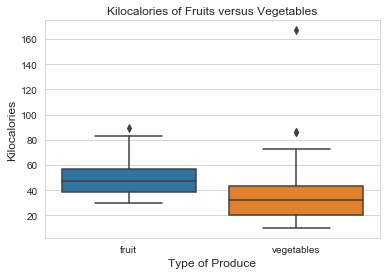

In [15]:
sns.set_style("whitegrid")
sns.boxplot(x="type", y="kilocal", data = kcal)
plt.title('Kilocalories of Fruits versus Vegetables')
plt.ylabel("Kilocalories", fontsize=12)
plt.xlabel('Type of Produce', fontsize=12)
plt.show()

In [16]:
kcal.loc[kcal['kilocal'] >140]
kcal.loc[kcal['kilocal'] >84]

,type,food,kilocal
14,fruit,bananas,89.0
38,vegetables,sweet_potatoes,86.0
42,vegetables,avocados,167.0
48,vegetables,corn_sweet,86.0


For this question I will be focusing on the median rather than the mean because the median is less affected by any outliers or skew in the data. In this plot we can see that fruits have more kilocalories than vegetables. Furthermore, I can see that there is a clear outlier for vegetables. Upon further inspection, the outlier is avocado, which has 167 kilocalories. The median or 50th percentile of fruits is 47 and for vegetables the median is 32 kcal. This means that 50% of the fruits have more than 47 kilocalories and 50% of the fruits have less than 47 kilocalories. Similarly for vegetables, 50% of them have more than 32 kilocalories and 50% have less than 32 kilocalories.  

In [183]:
# avg_kilo_calories = kcal.groupby(["type"]).mean()
# avg_kilo_calories.columns.values[0]="Kilocalories (kcal)"
# avg_kilo_calories.index.name = ""
# avg_kilo_calories

In [17]:
top = kcal.sort_values("kilocal",ascending=False)
top = top.sort_values('kilocal', ascending=False).groupby('type').head(5)

In [184]:
#want to see which vegetables have most kcal and fruit say top 5
#get the fruits
# top_fruit = top[top['type'] == "fruit"]
# top_five_fruit= top_fruit.head(5)
# top_five_fruit
# top_five_fruit.reset_index()
# top_five_fruit.reindex(index=range(0,5))
# top_five_fruit

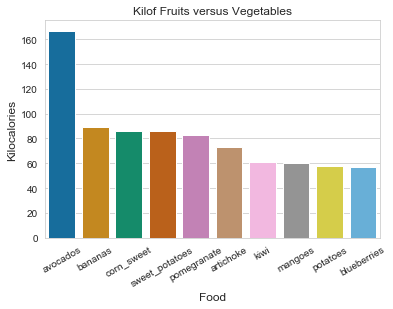

In [18]:
sns.set_style("whitegrid")
sns.set_palette("colorblind")
sns.barplot(x="food", y="kilocal",data = top,ci=None,)
plt.title('Kilof Fruits versus Vegetables')
plt.ylabel("Kilocalories", fontsize=12)
plt.xlabel('Food', fontsize=12)
plt.xticks(rotation=30)
plt.show()

From this plot, avocados have the highest number of kilocalories. If we were to exclude avocado and consider it an outlier, bannanas would be the fruit with the higest number of kilocalories. This then matches with the results from the boxplot. For people who are looking to improve their diet and looking to loose some weight, bannanas, pomegranate,avocadoes and sweet corn should be eaten in light moderation or avoided. 

In [30]:
# num_nutr = [len(ndb_report(api_key,i)['foods'][0]['food']['nutrients']) for i in newdata.ndbno]
# nutrient_data = pd.DataFrame(num_nutr)
#most are 33

The second question I will be answering is which food provides the widest variety of nutrients. My initial idea was to count up each nutrient within the specified food and sum them. However, I realized that almost all of the produce in this dataset had 33 nutrients. Thus, I will focus on four key ingredients: protein,fat (lipid), vitamin C and sodium. Vitamin C is essential for a healthy immune sysytem, sodium helps send nerve impulses while protein and lipids are used for repairing tissue and helps the skin and nails. Before I begin,exploring and analysing the data, I will start off by explaining how I interpret "most variety". I will interpret that phrase as the food with the highest total amount. To see which food provides the widest variety of nutrients I will first total up the amount of nutrients for each food. To make sure I am working with the same units I have converted all measurement to grams. 

In [28]:
food_nutrient = {}
for i in range(len(newdata.ndbno)):
    nutrients_list = ndb_report(newdata.ndbno[i])['foods'][0]['food']['nutrients']
    nutrients_info = {}
    for j in nutrients_list:
        nutrients_info[j['name']] = j['value']
    food_nutrient[newdata.food[i]] = nutrients_info

In [29]:
protein = [food_nutrient[food]['Protein'] for food in newdata.food]
fat = [food_nutrient[food]['Total lipid (fat)'] for food in newdata.food]
vitamin_c = [food_nutrient[food]['Vitamin C, total ascorbic acid'] for food in newdata.food]
sodium = [food_nutrient[food]['Sodium, Na'] for food in newdata.food]

In [30]:
essential_nut =  pd.DataFrame({'food':newdata.food, 'protein':protein, 'fat':fat, 'vitamin_c': vitamin_c, 'sodium':sodium,
                 "type":newdata.type})

In [31]:
essential_nut.protein = pd.to_numeric(essential_nut.protein)
essential_nut.fat = pd.to_numeric(essential_nut.fat)
essential_nut.vitamin_c = pd.to_numeric(essential_nut.vitamin_c)
essential_nut.sodium = pd.to_numeric(essential_nut.sodium)

In [32]:
essential_nut["vitamin_c"] = essential_nut["vitamin_c"]/1000
essential_nut["sodium"] = (essential_nut["sodium"])/1000
essential_nut["Total"] = essential_nut.protein + essential_nut.fat + essential_nut.sodium + essential_nut.vitamin_c

essential_nut.columns.values[1] = "Protein (g)"
essential_nut.columns.values[2] = "Lipid Fat (g)"
essential_nut.columns.values[3] = "Vitamin C(g)"
essential_nut.columns.values[4] = "Sodium:Na (g)"

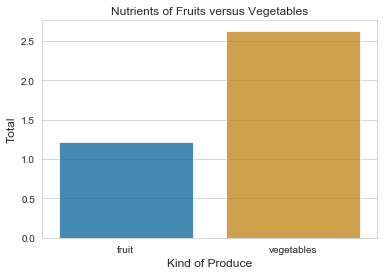

In [33]:
sns.barplot(x="type",y="Total", data = essential_nut,alpha=0.8,ci = None)
plt.title('Nutrients of Fruits versus Vegetables')
plt.ylabel('Total', fontsize=12)
plt.xlabel('Kind of Produce', fontsize=12)
plt.show()

From this plot we can see that foods in the vegetables have a higher total sum. Thus, I know that the food with the widest variety has to be in the vegetable category.

In [34]:
#create a new column 
essential_nut["scientific group"] = "unknown"

In [35]:
essential_nut.loc[essential_nut['food'].str.match("(cherries)|(nectarines)|apricots|peaches|plums|ploutos"),
                  'scientific group']='stone'

essential_nut.loc[essential_nut['food'].str.match("(watermelon)|(cantaloupe)|horned melon|honeydew"),
                  'scientific group']='melon'

essential_nut.loc[essential_nut['food'].str.contains("berries|pineapple"),'scientific group']='berries'

essential_nut.loc[essential_nut['food'].str.match("(oranges)|(mandarins)|grapefruit|(lemon)|(tangerines)"),
                  'scientific group']='citrus'

essential_nut.loc[essential_nut['food'].str.contains("peas|beans|cowpeas"),
                  'scientific group']='legumes'

essential_nut.loc[essential_nut['food'].str.contains("squash|cucumbers|zucchini|pumpkins"),
                  'scientific group']='cucurbits'

essential_nut.loc[essential_nut['food'].str.contains("brocolli|cauliflower|cabbage|kale|brussels_sprouts|radish|turnip|collard greens"),
                  'scientific group']='cole crop'

essential_nut.loc[essential_nut['food'].str.contains("eggplant|pepper|potato|tomato"),
                  'scientific group']='solanaceae'

essential_nut.loc[essential_nut['food'].str.contains("beet|carrot|garlic|leek|onion|parsnip"),
                  'scientific group']='root crops'


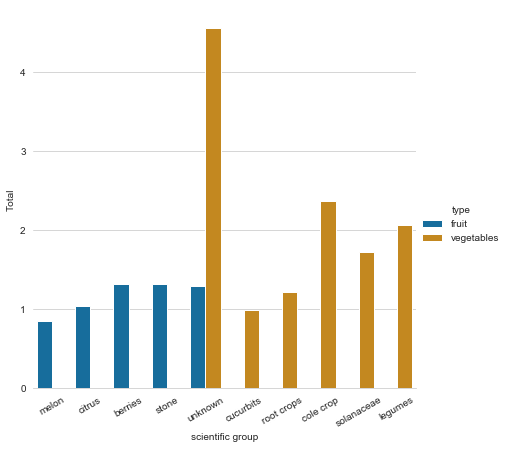

In [27]:
g=sns.catplot(x="scientific group",y="Total",hue="type",data = essential_nut, height=6, 
              kind="bar", palette="colorblind",ci=None)
g.despine(left=True)
g.set_ylabels("Total")
g.set_xticklabels(rotation=30)

I need to narrow my search down even more. I have created a new column in the dataset called scientific name that groups the fruits and vegetables into subcategories based on scientific group names I found from google. The produce that did not fit into any of the named categories is in the unknown category. This plot shows that the highest category of a sum of protein,fat,sodium, and vitamic C is unknown for vegetable. Based on out graph above, this seems to be correct. Also something to note is that fruit categories of melon,berries,etc tend to have an increasing trend. Furhtermore the unknown category contributed the most to the total amount of nutrients for vegetables.

In [36]:
essential_nut.groupby(["food"])['Total'].max()

food
acorn_squash          0.9140
apples                0.4356
apricots              1.8010
artichoke             2.0180
asparagus             2.3276
avocados             17.3868
bananas               1.4297
blackberries          1.9020
blueberries           1.0807
brussels_sprouts      3.7900
butternut_squash      1.1250
cantaloupe            1.0827
cherries              1.2293
collard_greens        3.6823
corn_sweet            4.4218
cucumbers peeled      0.7552
cucumbers w/ peel     0.7648
grapefruit            1.0133
grapes                1.2875
green cabbage         1.4346
green_beans           2.0682
green_peppers         1.1134
honeydew              0.7160
kale                  4.5564
kiwi                  1.7557
lettuce_iceberg       1.0528
mangoes               1.2374
mustard_greens        3.3700
nectarines            1.3854
okra                  2.1500
onions                1.2114
oranges               1.3885
papaya                0.7989
peaches               1.1666
pears    

The above line of code gives me the food with the highest grams of nutrients which is avocado. Thus, avocado is  the most nutritious vegetable. However, it is interesting to note that the most nutritious vegetable also happened to have the highest number of kilocalories if we do not condiser avocado as an outlier. 